In [1]:
%matplotlib inline

In [2]:
# imports
from __future__ import print_function,absolute_import,division,unicode_literals
import numpy as np
import glob,os,sys,copy,imp 
from scipy import stats as scistats
import matplotlib as mpl
mpl.rcParams['font.family']='stixgeneral'
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import QTable,Table
from astropy.io import ascii,fits
from astropy import units as u
from astropy import constants as const
from astropy.coordinates import SkyCoord
from linetools.spectralline import AbsLine
import linetools.utils as ltu
from xastropy.igm.abs_sys import abssys_utils as abssys
from xastropy import spec as xpsec
from xastropy.plotting import utils as xputils
from xastropy.xutils import xdebug as xdb
from xastropy.obs import radec as xor
from xastropy.atomic import ionization as xai
from xastropy.xutils import fits as xxf
sys.path.append(os.path.abspath("../../../../py"))
from enigma.qpq import utils as qpqutils
from enigma.qpq import spec as qpqs
from enigma.qpq import stacks as qpqk
sys.path.append(os.path.abspath("../Bootstrap/py"))
import qpq9_boot as qpq9b
sys.path.append(os.path.abspath("./py"))
import qpq9_stacks as qpq9k

/Users/lwymarie/anaconda/lib/python2.7/site-packages/astroquery/sdss/__init__.py:28: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


# Load stack_tup

/Users/lwymarie/python/specdb/specdb/query_catalog.py:140: UserWarning: No sources found at your coordinate within tol=0.5 arcsec.  Returning None
  warnings.warn("No sources found at your coordinate within tol={:g}.  Returning None".format(tol))
/Users/lwymarie/python/linetools/linetools/spectra/xspectrum1d.py:295: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
2.18834992125 1 / Angstrom
No spectrum found for BOSSJ0008-0039 and wvobs=3920.97 Angstrom!
No spectrum found for BOSSJ0042+1350 and wvobs=3704.79 Angstrom!
18.0177891668 1 / Angstrom
7.24401232456 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ034138.15+000002.9_b1200_F.fits.gz for SDSSJ0341-0000
S/N 18.0177891668 1 / Angstrom


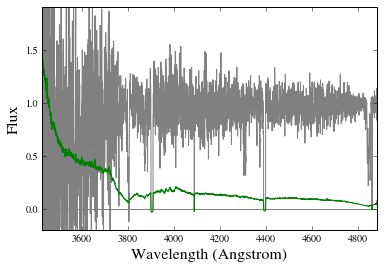

125.155779932 1 / Angstrom
10.0991457001 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ080049.90+354249.6_b1200_F.fits.gz for APOJ0800+3542
S/N 125.155779932 1 / Angstrom


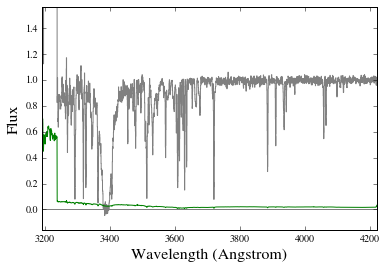

4.55242870121 1 / Angstrom
No spectrum found for BOSSJ0809+4539 and wvobs=4058.56 Angstrom!
No spectrum found for BOSSJ0826+4708 and wvobs=3734.97 Angstrom!
15.4817897943 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ082843.37+454517.3_b1200_F.fits.gz for SDSSJ0828+4545
S/N 15.4817897943 1 / Angstrom


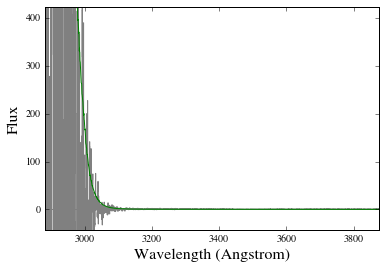

98.2174069542 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ083757.91+383727.1_b1200_F.fits.gz for APOJ0837+3837
S/N 98.2174069542 1 / Angstrom


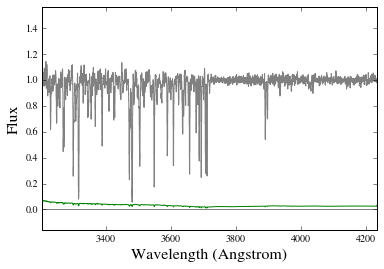

61.2522564054 1 / Angstrom
9.01963993717 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ084158.47+392120.9_b1200_F.fits.gz for BOSSJ0841+3921
S/N 61.2522564054 1 / Angstrom


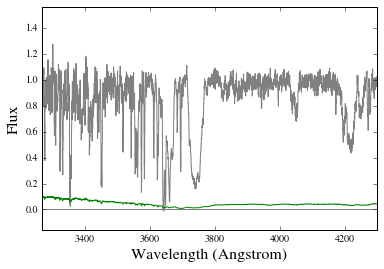

21.9498179395 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ085358.36-001108.0_F.fits.gz for BOSSJ0853-0011
S/N 21.9498179395 1 / Angstrom


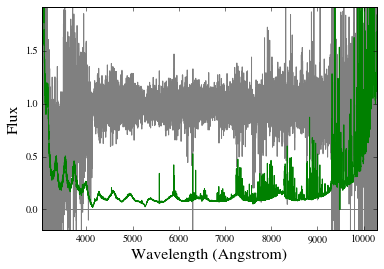

No spectrum found for BOSSJ0903+5133 and wvobs=3827.56 Angstrom!
No spectrum found for BOSSJ0904+0042 and wvobs=3493.83 Angstrom!
11.887746149 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ091338.30-010708.7.fits for BOSSJ0913-0107
S/N 11.887746149 1 / Angstrom


/Users/lwymarie/python/specdb/specdb/query_catalog.py:145: UserWarning: Found multiple sources in the catalog. Taking the closest one
  warnings.warn("Found multiple sources in the catalog. Taking the closest one")


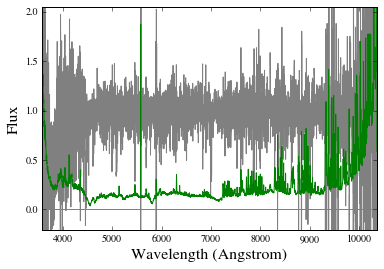

8.5530874456 1 / Angstrom
Using spSpec-51929-0473-269.fit.gz for BOSSJ0915+0119
S/N 8.5530874456 1 / Angstrom


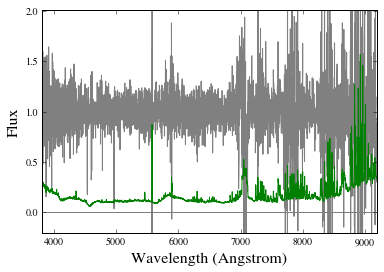

53.3087865228 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ092417.66+392920.3_b1200_F.fits.gz for APOJ0924+3929
S/N 53.3087865228 1 / Angstrom


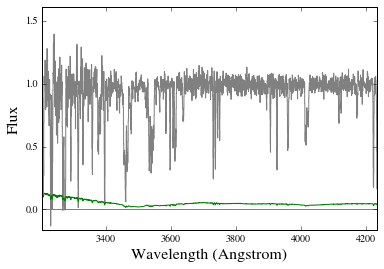

80.170713373 1 / Angstrom
15.3248299034 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ093226.34+092526.1_F.fits.gz for APOJ0932+0925
S/N 80.170713373 1 / Angstrom


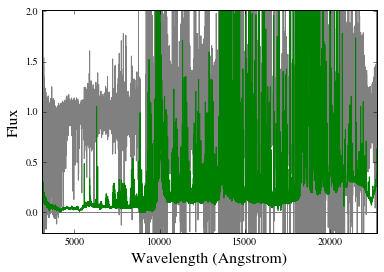

28.6140248967 1 / Angstrom
No continuum: J100246.8+002103a.fits.gz
Using spSpec-51910-0269-386.fit.gz for BOSSJ1002+0020
S/N 28.6140248967 1 / Angstrom


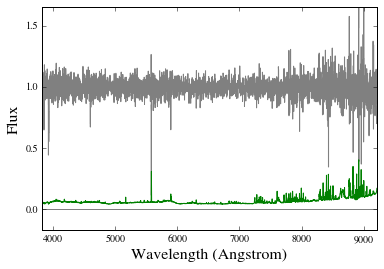

6.05710045708 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ100509.60+501929.8_b1200_F.fits.gz for SDSSJ1005+5019
S/N 6.05710045708 1 / Angstrom


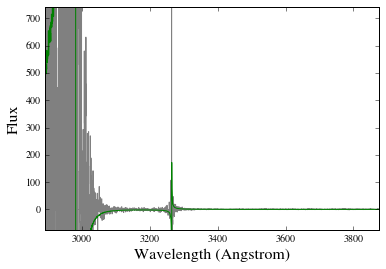

69.5111718621 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ100941.35+250104.1_b1200_F.fits.gz for APOJ1009+2500
S/N 69.5111718621 1 / Angstrom


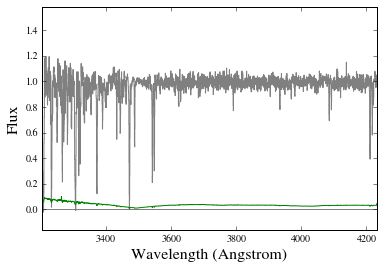

No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ102618.81+461445.3_b400_F.fits.gz
77.6896874169 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ102618.81+461445.3_F.fits.gz for APOJ1026+4614
S/N 77.6896874169 1 / Angstrom


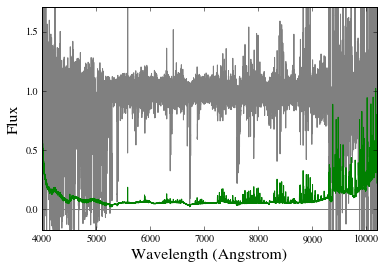

11.9475972589 1 / Angstrom
Using spSpec-52354-0875-478.fit.gz for BOSSJ1036+5012
S/N 11.9475972589 1 / Angstrom


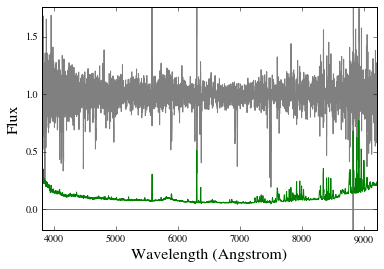

121.397466069 1 / Angstrom
41.7572731421 1 / Angstrom
11.0641709939 1 / Angstrom
114.07819263 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ103857.37+502708.0_b1200_F.fits.gz for BOSSJ1039+5026
S/N 121.397466069 1 / Angstrom


/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:850: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__itruediv__(other)


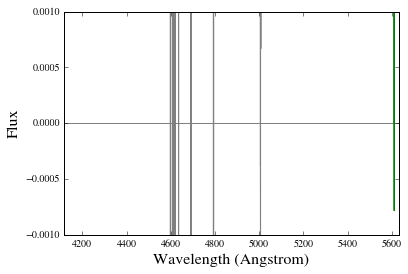

7.5246858368 1 / Angstrom
Using spSpec-51930-0489-120.fit.gz for BOSSJ1042+6459
S/N 7.5246858368 1 / Angstrom


/Users/lwymarie/python/linetools/linetools/spectra/xspectrum1d.py:807: UserWarning: Ignoring NAN and inf in flux
  warnings.warn("Ignoring NAN and inf in flux")


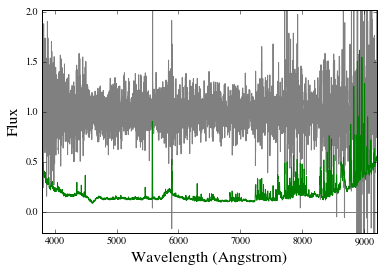

30.3341940331 1 / Angstrom
73.0125866997 1 / Angstrom
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ114146.19+072411.0_b400_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ114146.19+072411.0_F.fits.gz for APOJ1141+0724
S/N 73.0125866997 1 / Angstrom


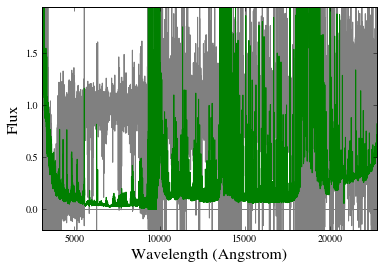

76.9490837262 1 / Angstrom
100.859405816 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ114435.54+095921.7_F.fits.gz for BOSSJ1144+0959
S/N 100.859405816 1 / Angstrom


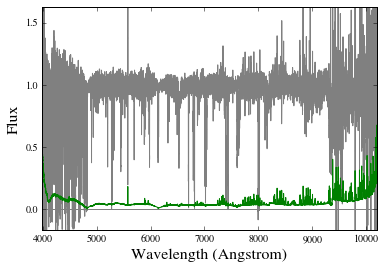

78.849265191 1 / Angstrom
64.3524427528 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ120417.47+022104.7_b1200_F.fits.gz for BOSSJ1204+0221
S/N 78.849265191 1 / Angstrom


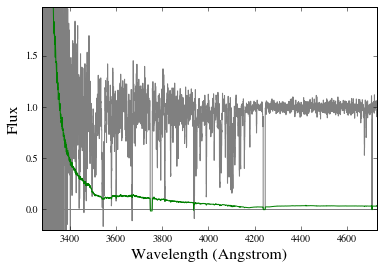

No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ121559.00+571616.6_b1200_F.fits.gz
No spectrum found for BOSSJ1215+5715 and wvobs=3909.89 Angstrom!
101.187929227 1 / Angstrom
15.3485105025 1 / Angstrom
41.6552887004 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ123143.10+002846.3_b600_F.fits.gz for BOSSJ1231+0029
S/N 101.187929227 1 / Angstrom


/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:858: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__rtruediv__(other)


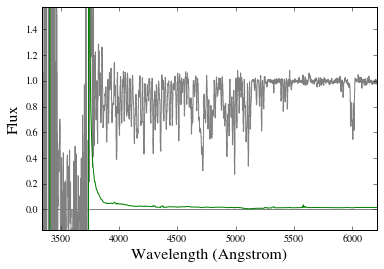

4.84638052762 1 / Angstrom
No spectrum found for BOSSJ1244+3208 and wvobs=3991.59 Angstrom!
9.40677770178 1 / Angstrom
Using spSpec-52320-0782-411.fit.gz for BOSSJ1253+6327
S/N 9.40677770178 1 / Angstrom


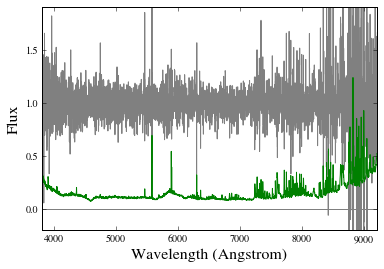

28.4829823261 1 / Angstrom
3.87868601673 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ130605.19+615823.7_b1200_F.fits.gz for APOJ1306+6158
S/N 28.4829823261 1 / Angstrom


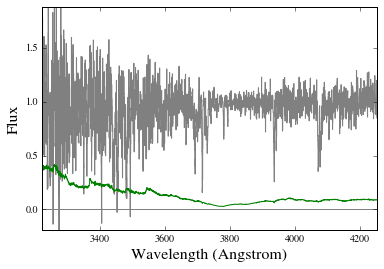

24.9723062986 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ135632.44+613300.7_b1200_F.fits.gz for BOSSJ1356+6133
S/N 24.9723062986 1 / Angstrom


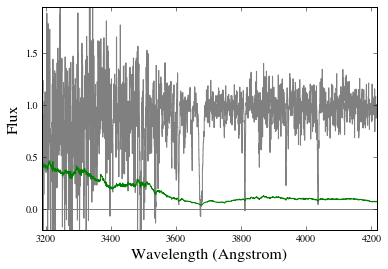

No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ135849.72+273806.9_b1200_F.fits.gz
No spectrum found for APOJ1358+2737 and wvobs=3869.62 Angstrom!
29.109564037 1 / Angstrom
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ142054.42+160333.3_b1200_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ142054.42+160333.3_F.fits.gz for APOJ1420+1603
S/N 29.109564037 1 / Angstrom


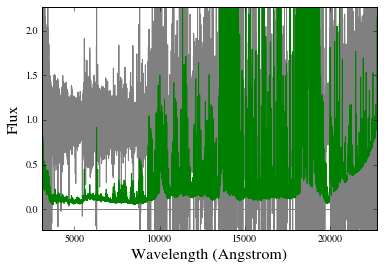

172.057404645 1 / Angstrom
93.386415928 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ142758.89-012130.4_b1200_F.fits.gz for BOSSJ1427-0121
S/N 172.057404645 1 / Angstrom


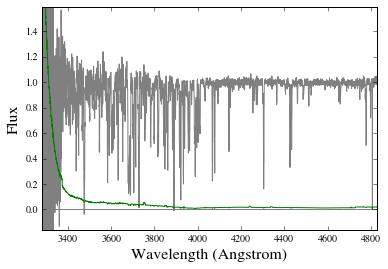

39.1207955714 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ143345.50+064110.0_F.fits.gz for BOSSJ1433+0641
S/N 39.1207955714 1 / Angstrom


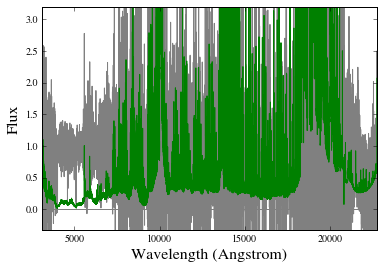

6.41170547668 1 / Angstrom
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ155325.61+192140.9_b1200_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ155325.61+192140.9_F.fits.gz for APOJ1553+1921
S/N 6.41170547668 1 / Angstrom


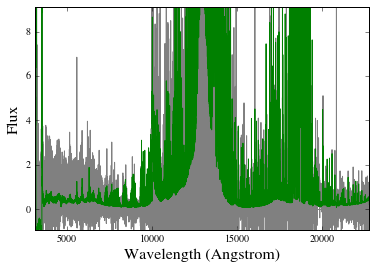

48.137098727 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ155947.73+494307.0_b1200_F.fits.gz for APOJ1559+4943
S/N 48.137098727 1 / Angstrom


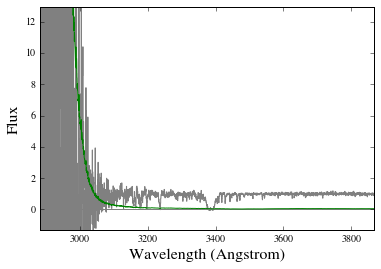

15.9337005813 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ160547.61+511330.5_b1200_F.fits.gz for BOSSJ1605+5113
S/N 15.9337005813 1 / Angstrom


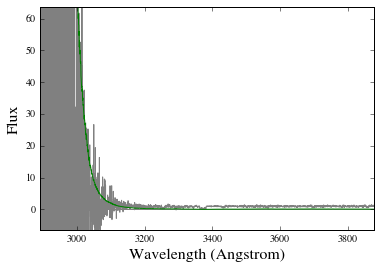

9.76300663729 1 / Angstrom
Using spSpec-54585-2968-628.fit.gz for BOSSJ1618+1842
S/N 9.76300663729 1 / Angstrom


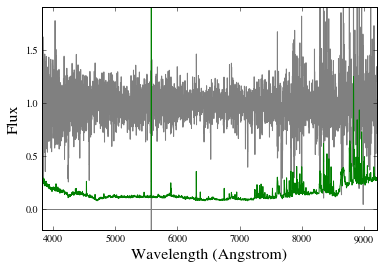

100.996033224 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ162738.63+460538.4_F.fits.gz for APOJ1627+4606
S/N 100.996033224 1 / Angstrom


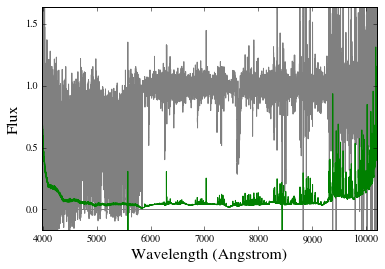

2.30822912874 1 / Angstrom
No spectrum found for BOSSJ2255-0009 and wvobs=4017.08 Angstrom!


In [3]:
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=1334.5323*u.AA,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999),
                              stack_fg=True)
# Mask
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,dd in enumerate(all_dict):
    if dd is None:
        continue
    if 'J1508+3635' in dd['qpq']['NAME']: #DLA not excluded by forest cut, should be excluded now
        idx_mask.append(ii) 
for idx in idx_mask:
    stck_mskN[idx,:] = 0.

In [4]:
np.sum(stck_mskN,0)

array([ 32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,
        32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,
        32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,
        32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,
        32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,
        32.,  32.,  32.,  32.,  32.,  32.])

# Stack and Plot

## Mean

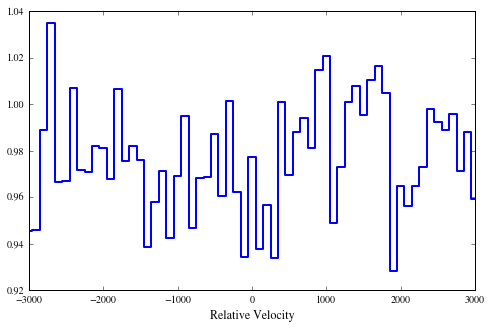

In [5]:
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

## Median

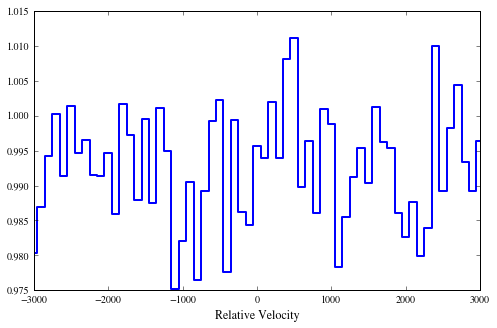

In [6]:
fin_velo, fin_flx_med, all_dict = qpqk.stack_med(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx_med, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

# Plot individual spectra

/Users/lwymarie/python/specdb/specdb/query_catalog.py:140: UserWarning: No sources found at your coordinate within tol=0.5 arcsec.  Returning None
  warnings.warn("No sources found at your coordinate within tol={:g}.  Returning None".format(tol))
/Users/lwymarie/python/linetools/linetools/spectra/xspectrum1d.py:295: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
2.18834992125 1 / Angstrom
No spectrum found for BOSSJ0008-0039 and wvobs=3920.97 Angstrom!
No spectrum found for BOSSJ0042+1350 and wvobs=3704.79 Angstrom!
18.0177891668 1 / Angstrom
7.24401232456 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ034138.15+000002.9_b1200_F.fits.gz for SDSSJ0341-0000
S/N 18.0177891668 1 / Angstrom


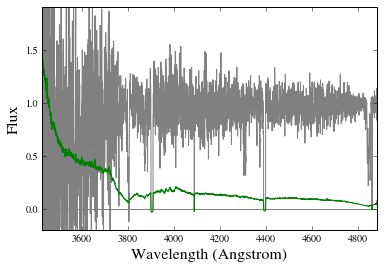

125.155779932 1 / Angstrom
10.0991457001 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ080049.90+354249.6_b1200_F.fits.gz for APOJ0800+3542
S/N 125.155779932 1 / Angstrom


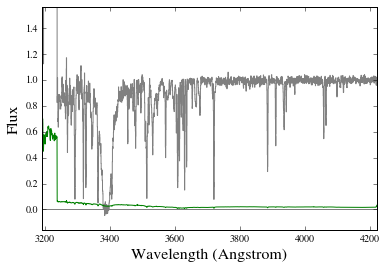

4.55242870121 1 / Angstrom
No spectrum found for BOSSJ0809+4539 and wvobs=4058.56 Angstrom!
No spectrum found for BOSSJ0826+4708 and wvobs=3734.97 Angstrom!
15.4817897943 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ082843.37+454517.3_b1200_F.fits.gz for SDSSJ0828+4545
S/N 15.4817897943 1 / Angstrom


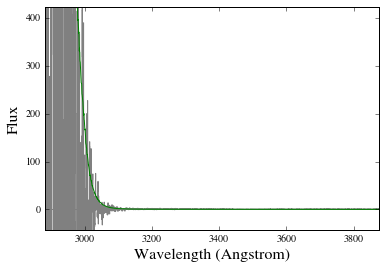

98.2174069542 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ083757.91+383727.1_b1200_F.fits.gz for APOJ0837+3837
S/N 98.2174069542 1 / Angstrom


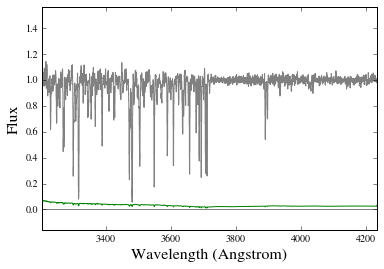

61.2522564054 1 / Angstrom
9.01963993717 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ084158.47+392120.9_b1200_F.fits.gz for BOSSJ0841+3921
S/N 61.2522564054 1 / Angstrom


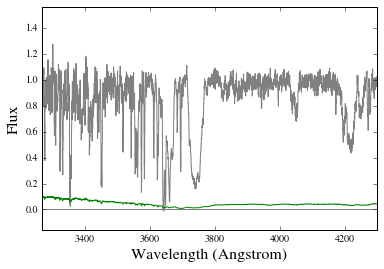

21.9498179395 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ085358.36-001108.0_F.fits.gz for BOSSJ0853-0011
S/N 21.9498179395 1 / Angstrom


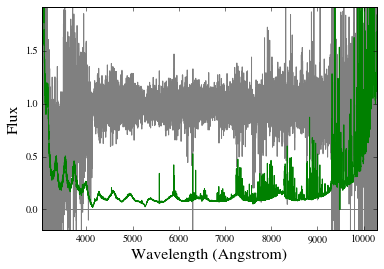

No spectrum found for BOSSJ0903+5133 and wvobs=3827.56 Angstrom!
No spectrum found for BOSSJ0904+0042 and wvobs=3493.83 Angstrom!
11.887746149 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ091338.30-010708.7.fits for BOSSJ0913-0107
S/N 11.887746149 1 / Angstrom


/Users/lwymarie/python/specdb/specdb/query_catalog.py:145: UserWarning: Found multiple sources in the catalog. Taking the closest one
  warnings.warn("Found multiple sources in the catalog. Taking the closest one")


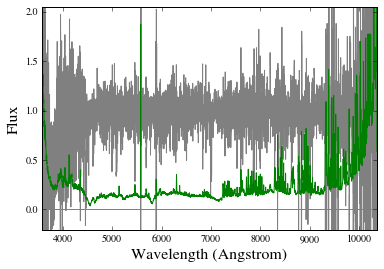

8.5530874456 1 / Angstrom
Using spSpec-51929-0473-269.fit.gz for BOSSJ0915+0119
S/N 8.5530874456 1 / Angstrom


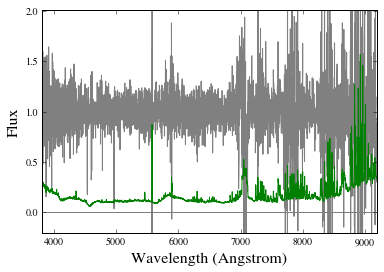

53.3087865228 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ092417.66+392920.3_b1200_F.fits.gz for APOJ0924+3929
S/N 53.3087865228 1 / Angstrom


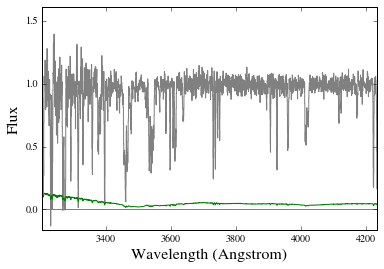

80.170713373 1 / Angstrom
15.3248299034 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ093226.34+092526.1_F.fits.gz for APOJ0932+0925
S/N 80.170713373 1 / Angstrom


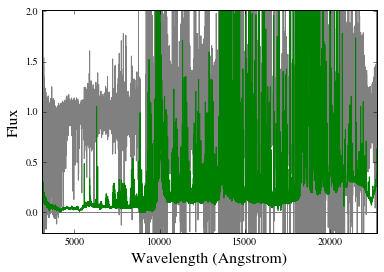

28.6140248967 1 / Angstrom
No continuum: J100246.8+002103a.fits.gz
Using spSpec-51910-0269-386.fit.gz for BOSSJ1002+0020
S/N 28.6140248967 1 / Angstrom


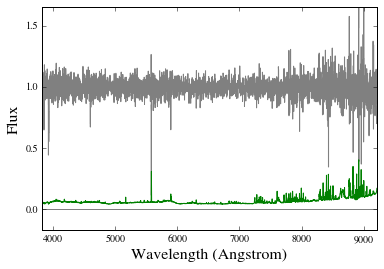

6.05710045708 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ100509.60+501929.8_b1200_F.fits.gz for SDSSJ1005+5019
S/N 6.05710045708 1 / Angstrom


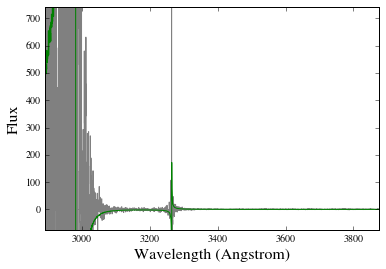

69.5111718621 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ100941.35+250104.1_b1200_F.fits.gz for APOJ1009+2500
S/N 69.5111718621 1 / Angstrom


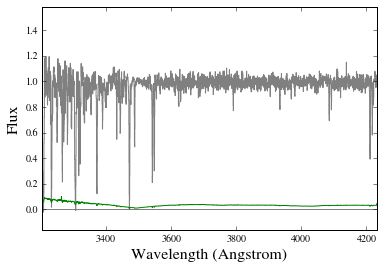

No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ102618.81+461445.3_b400_F.fits.gz
77.6896874169 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ102618.81+461445.3_F.fits.gz for APOJ1026+4614
S/N 77.6896874169 1 / Angstrom


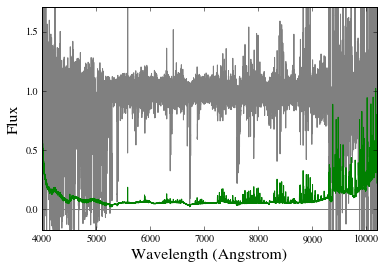

11.9475972589 1 / Angstrom
Using spSpec-52354-0875-478.fit.gz for BOSSJ1036+5012
S/N 11.9475972589 1 / Angstrom


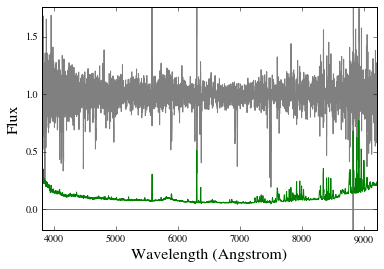

121.397466069 1 / Angstrom
41.7572731421 1 / Angstrom
11.0641709939 1 / Angstrom
114.07819263 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ103857.37+502708.0_b1200_F.fits.gz for BOSSJ1039+5026
S/N 121.397466069 1 / Angstrom


/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:850: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__itruediv__(other)


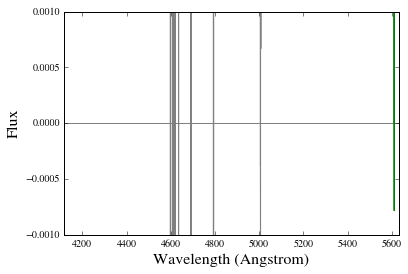

7.5246858368 1 / Angstrom
Using spSpec-51930-0489-120.fit.gz for BOSSJ1042+6459
S/N 7.5246858368 1 / Angstrom


/Users/lwymarie/python/linetools/linetools/spectra/xspectrum1d.py:807: UserWarning: Ignoring NAN and inf in flux
  warnings.warn("Ignoring NAN and inf in flux")


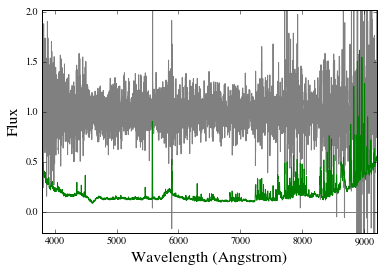

30.3341940331 1 / Angstrom
73.0125866997 1 / Angstrom
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ114146.19+072411.0_b400_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ114146.19+072411.0_F.fits.gz for APOJ1141+0724
S/N 73.0125866997 1 / Angstrom


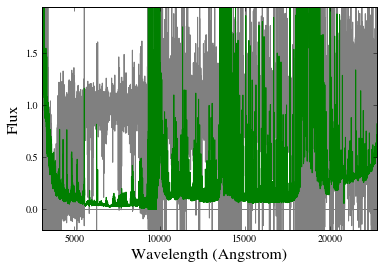

76.9490837262 1 / Angstrom
100.859405816 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ114435.54+095921.7_F.fits.gz for BOSSJ1144+0959
S/N 100.859405816 1 / Angstrom


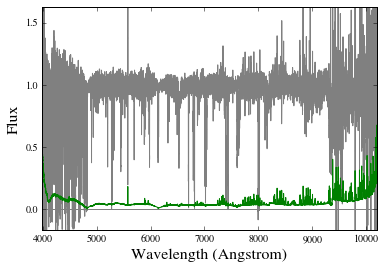

78.849265191 1 / Angstrom
64.3524427528 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ120417.47+022104.7_b1200_F.fits.gz for BOSSJ1204+0221
S/N 78.849265191 1 / Angstrom


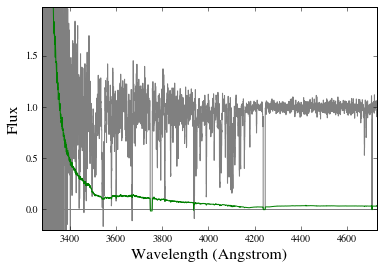

No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ121559.00+571616.6_b1200_F.fits.gz
No spectrum found for BOSSJ1215+5715 and wvobs=3909.89 Angstrom!
101.187929227 1 / Angstrom
15.3485105025 1 / Angstrom
41.6552887004 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ123143.10+002846.3_b600_F.fits.gz for BOSSJ1231+0029
S/N 101.187929227 1 / Angstrom


/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:858: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__rtruediv__(other)


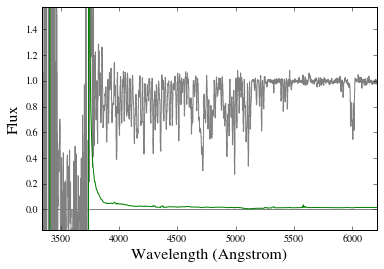

4.84638052762 1 / Angstrom
No spectrum found for BOSSJ1244+3208 and wvobs=3991.59 Angstrom!
9.40677770178 1 / Angstrom
Using spSpec-52320-0782-411.fit.gz for BOSSJ1253+6327
S/N 9.40677770178 1 / Angstrom


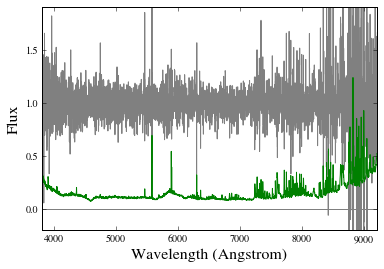

28.4829823261 1 / Angstrom
3.87868601673 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ130605.19+615823.7_b1200_F.fits.gz for APOJ1306+6158
S/N 28.4829823261 1 / Angstrom


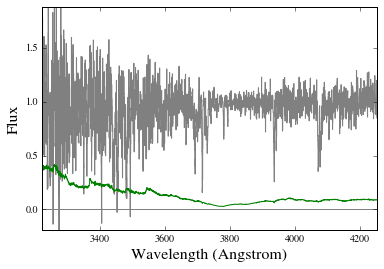

24.9723062986 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ135632.44+613300.7_b1200_F.fits.gz for BOSSJ1356+6133
S/N 24.9723062986 1 / Angstrom


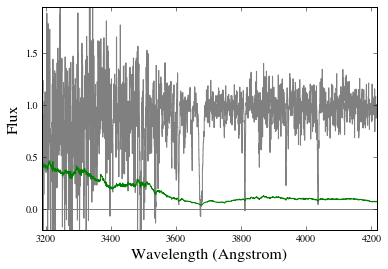

No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ135849.72+273806.9_b1200_F.fits.gz
No spectrum found for APOJ1358+2737 and wvobs=3869.62 Angstrom!
29.109564037 1 / Angstrom
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ142054.42+160333.3_b1200_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ142054.42+160333.3_F.fits.gz for APOJ1420+1603
S/N 29.109564037 1 / Angstrom


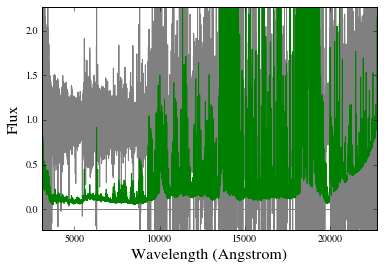

172.057404645 1 / Angstrom
93.386415928 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ142758.89-012130.4_b1200_F.fits.gz for BOSSJ1427-0121
S/N 172.057404645 1 / Angstrom


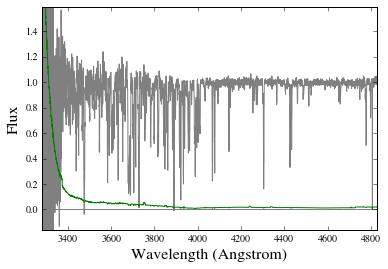

39.1207955714 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ143345.50+064110.0_F.fits.gz for BOSSJ1433+0641
S/N 39.1207955714 1 / Angstrom


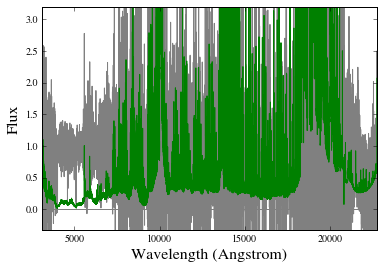

6.41170547668 1 / Angstrom
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ155325.61+192140.9_b1200_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ155325.61+192140.9_F.fits.gz for APOJ1553+1921
S/N 6.41170547668 1 / Angstrom


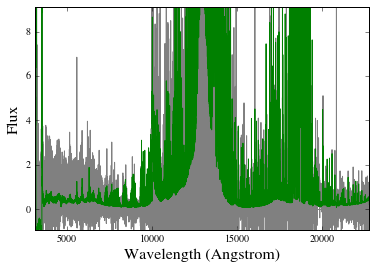

48.137098727 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ155947.73+494307.0_b1200_F.fits.gz for APOJ1559+4943
S/N 48.137098727 1 / Angstrom


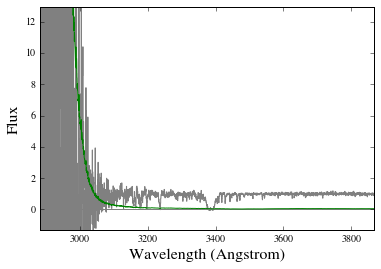

15.9337005813 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ160547.61+511330.5_b1200_F.fits.gz for BOSSJ1605+5113
S/N 15.9337005813 1 / Angstrom


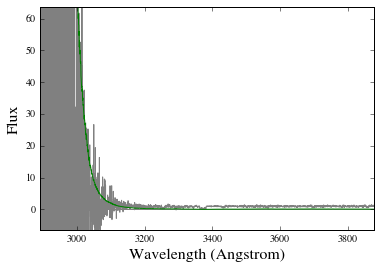

9.76300663729 1 / Angstrom
Using spSpec-54585-2968-628.fit.gz for BOSSJ1618+1842
S/N 9.76300663729 1 / Angstrom


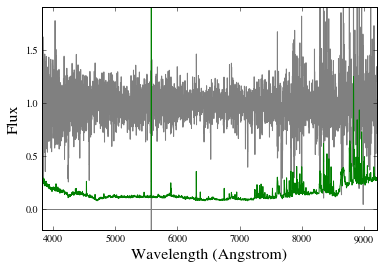

100.996033224 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ162738.63+460538.4_F.fits.gz for APOJ1627+4606
S/N 100.996033224 1 / Angstrom


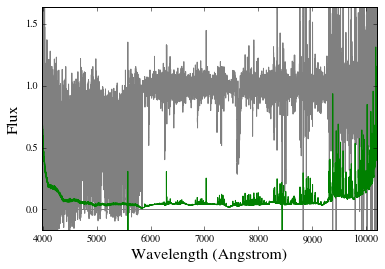

2.30822912874 1 / Angstrom
No spectrum found for BOSSJ2255-0009 and wvobs=4017.08 Angstrom!
Wrote plt_qpq9_IRMgII_1334_fg_page1.pdf
Wrote plt_qpq9_IRMgII_1334_fg_page1.pdf
Wrote plt_qpq9_IRMgII_1334_fg_page1.pdf


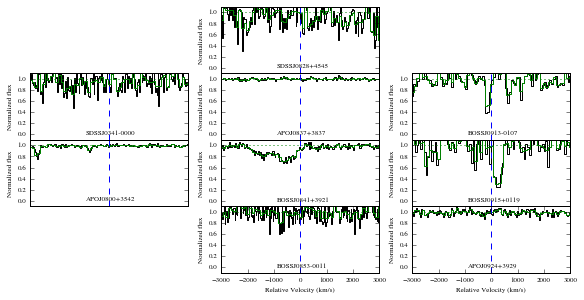

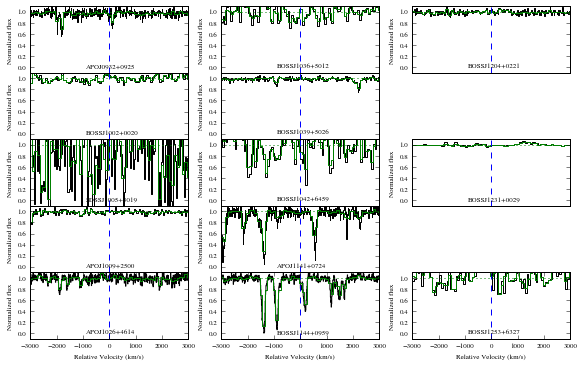

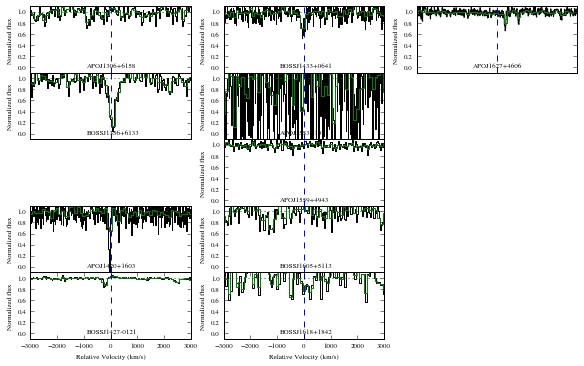

In [3]:
qpq9k.plt_qpq9(wrest=1334.5323*u.AA,S2N_cut=5.5/u.AA,stack_fg=True,zfg_mnx=(1.6,9999))